<a href="https://colab.research.google.com/github/nhysmith/4650_HW_5/blob/main/HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy
!pip install newsapi-python


In [ ]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import spacy
import en_core_web_lg
nlp_eng = spacy.load('en_core_web_lg')
from newsapi import NewsApiClient
newsapi = NewsApiClient (api_key='18d5c65bfd6e4a94a178b7e6d67f35eb')

In [ ]:
articles = []
x = range(1,5)
for i in x:
  temp = newsapi.get_everything(q='coronavirus',
                                      from_param='2021-09-22',
                                      to='2021-10-22',
                                      language='en',
                                      sort_by='relevancy',
                                      page=5)
  articles.append(temp)

In [ ]:
import pickle
filename = 'articlesCOVID.pckl'
pickle.dump(articles, open(filename, 'wb'))

filename = 'articlesCOVID.pckl'
loaded_model = pickle.load(open(filename, 'rb'))

filepath = '/content/articlesCOVID.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

In [ ]:
import pandas as pd

df = pd.DataFrame(temp['articles']) 
df = df.dropna()
df.head()

print(articles)

[{'status': 'ok', 'totalResults': 43474, 'articles': [{'source': {'id': 'reuters', 'name': 'Reuters'}, 'author': None, 'title': 'Italian police use water cannon to push back anti-vax protesters in Rome - Reuters', 'description': "Italian police on Saturday used water cannon to push back hundreds of people demonstrating in Rome against coronavirus vaccination, seeking to keep them from the prime minister's office.", 'url': 'https://www.reuters.com/world/europe/italian-police-use-water-cannon-push-back-anti-vax-protesters-rome-2021-10-09/', 'urlToImage': 'https://www.reuters.com/resizer/aQ2aCOaJlmhdb5cYU-gM9e17Rt0=/1200x628/smart/filters:quality(80)/cloudfront-us-east-2.images.arcpublishing.com/reuters/DVC3EGYG4ZJ5JCFMKGVGWJ474A.jpg', 'publishedAt': '2021-10-09T17:29:00Z', 'content': 'ROME, Oct 9 (Reuters) - Italian police on Saturday used water cannon to push back hundreds of people demonstrating in Rome against coronavirus vaccination, seeking to keep them from the prime ministe… [+132

In [ ]:
dados = []
for i, article in enumerate(articles):
    for x in article['articles']:
        title = x['title']
        date = x['publishedAt']
        description = x['description']
        content = x['content']
        dados.append({'title':title, 'date':date, 'desc':description, 'content':content})
df = pd.DataFrame(dados)
df = df.dropna()
df.head()

,title,date,desc,content
0,Italian police use water cannon to push back a...,2021-10-09T17:29:00Z,Italian police on Saturday used water cannon t...,"ROME, Oct 9 (Reuters) - Italian police on Satu..."
1,Biden's popularity rises slightly as coronavir...,2021-10-08T19:51:00Z,U.S. President Joe Biden’s approval rating has...,U.S. President Joe Biden gestures upon his arr...
2,Japan to end state of emergency on Thursday - ...,2021-09-28T13:14:50Z,Japan will lift its coronavirus state of emerg...,Posted \r\nJapan will lift its coronavirus sta...
3,"Asian shares wobble as Evergrande, inflation w...",2021-10-04T05:54:00Z,Asian shares dipped on Monday as concerns abou...,"TOKYO, Oct 4 (Reuters) - Asian shares dipped o..."
4,"Asian shares slip as Evergrande, inflation wor...",2021-10-04T02:48:00Z,Asian shares dipped on Monday as concerns abou...,A man watches an electric board showing Nikkei...


In [ ]:
import string
pos_tag = {'VERB', 'NOUN', 'PROPN'}

def get_keywords_eng(text):
  result = []
  for token in nlp_eng(text):
    if (token.text in nlp_eng.Defaults.stop_words or token.text in string.punctuation):
      continue
    if (token.pos_ in pos_tag):
      result.append(token.text)

  return result


In [ ]:
from collections import Counter
results = []
for content in df.content.values:
    results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])
df['keywords'] = results

In [ ]:
print(results)

[['#ROME', '#Oct', '#Reuters', '#police', '#Saturday'], ['#U.S.', '#Chicago', '#President', '#Joe', '#Biden'], ['#Posted', '#Japan', '#lift', '#coronavirus', '#state'], ['#TOKYO', '#Oct', '#Reuters', '#shares', '#dipped'], ['#man', '#watches', '#board', '#showing', '#Nikkei'], ['#Reuters', '#Staff', '#DAKAR', '#Sept', '#Gambias'], ['#Britain', '#People', '#walk', '#Westminster', '#Bridge'], ['#Reuters', '#Staff', '#ZURICH', '#Oct', '#manufacturers'], ['#People', '#wear', '#face', '#masks', '#sit'], ['#President', '#Vladimir', '#Putin', '#Tayyip', '#Erdogan'], ['#People', '#line', '#receive', '#vaccine', '#coronavirus'], ['#People', '#queue', '#receive', '#vaccine', '#coronavirus'], ['#wait', '#Jeep', '#debut', '#awaited', '#Grand'], ['#Sydney', '#travelers', '#Article', '#content', '#Heres'], ['#lady', '#doth', '#protest', '#methinks', '#Fox'], ['#patients', '#Covid', '#requiring', '#NHSs', '#form'], ['#Vine', '#television', '#radio', '#presenter', '#Jeremy'], ['#deaths', '#UK', '#repo

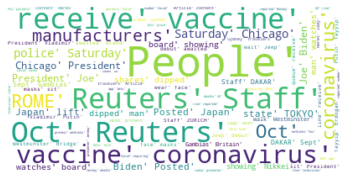

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [50]:
f = open("dataset.txt", "w")
for i in results:
  f.write(str(i))
  f.write('\n')
f.close()